In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

In [13]:
X,y = mglearn.datasets.make_forge()

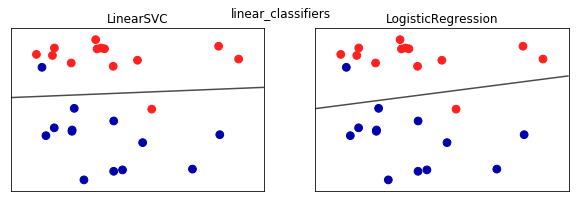

In [14]:
#Classificacao binaria com metodos de regressao.
fig, axes = plt.subplots(1,2,figsize=(10,3))
plt.suptitle("linear_classifiers")

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    ax.scatter(X[:,0],X[:,1],c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__)

In [15]:
#o parametro que determina a forca da regularizacao é chamado de C.
#altos valores para C correspondem a pouca regularizacao.
#ou seja, usar altos valores para C faz com que os metodos
#tentem encaixar o conjunto de treinamento o melhor possivel.
#enquanto valores baixos colocam mais enfase em encontrar um coeficiente
#w que seja proximo a zero.

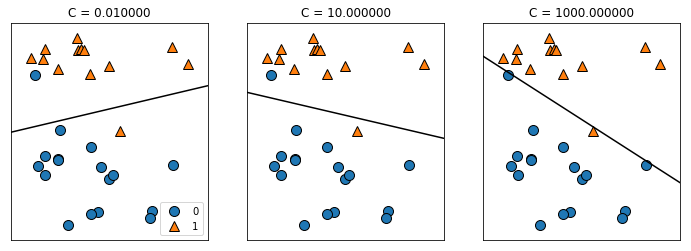

In [16]:
mglearn.plots.plot_linear_svc_regularization()

In [17]:
#c com valores baixos -> pouca regularizacao

#metodos de regressao sao bastante restritos com modelos de
#baixa dimensoes.
#Vamos analizar o mesmo modelo no dataset breast_cancer.

In [21]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'feature_names', 'DESCR', 'target', 'target_names'])

In [28]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [36]:
def show_score(r,X_train, X_test, y_train, y_test):
    print("training set score: %f" % r.score(X_train, y_train))
    print("test set score: %f" % r.score(X_test, y_test))

In [37]:
logisticregression = LogisticRegression().fit(X_train,y_train)
show_score(logisticregression,X_train, X_test, y_train, y_test)

training set score: 0.955399
test set score: 0.958042


In [38]:
#o valor default C=1 já produz uma boa performace.

In [39]:
logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
show_score(logisticregression100,X_train, X_test, y_train, y_test)

training set score: 0.971831
test set score: 0.965035


In [40]:
logisticregression001 = LogisticRegression(C=0.01).fit(X_train,y_train)
show_score(logisticregression001,X_train, X_test, y_train, y_test)

training set score: 0.934272
test set score: 0.930070


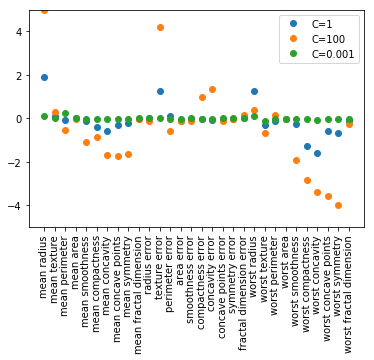

In [42]:
plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5,5)
plt.legend()

In [ ]:
#multiclass classification com metodos de regressao.
